<a href="https://colab.research.google.com/github/drpetros11111/Tensorflow_Portilia/blob/CNN/02_Keras_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong>
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [58]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [59]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [60]:
x_train.shape

(50000, 32, 32, 3)

In [61]:
x_train[0].shape

(32, 32, 3)

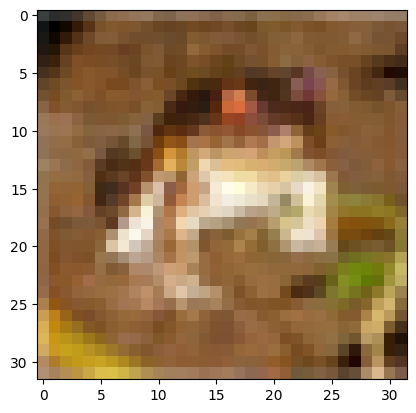

In [62]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as plt.

plt.imshow(x_train[0]) # Now you can use plt to access the imshow function.

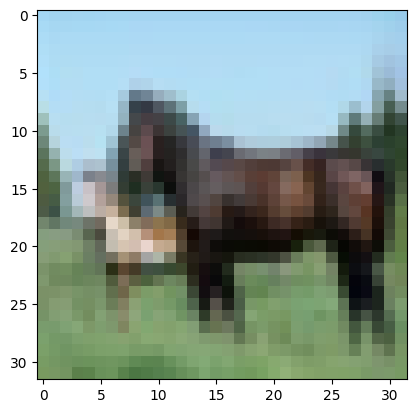

In [63]:
# FROG
plt.imshow(x_train[12])

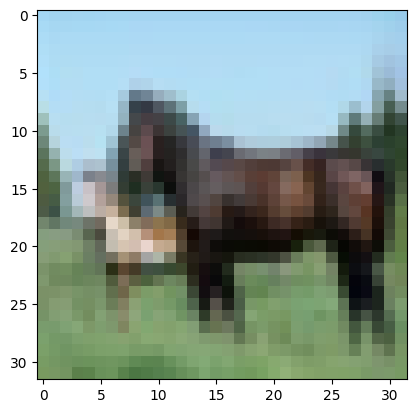

In [64]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
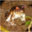

In [65]:
x_train[0]

In [66]:
x_train[0].shape

(32, 32, 3)

In [67]:
x_train.max()

255

In [68]:
x_train = x_train/225

In [69]:
x_test = x_test/255

In [70]:
x_train.shape

(50000, 32, 32, 3)

In [71]:
x_test.shape

(10000, 32, 32, 3)

In [72]:
from tensorflow.keras.utils import to_categorical

# Explanation of the to_categorical Function
The to_categorical function in TensorFlow's Keras utility module is used to convert class labels (usually integers) into a one-hot encoded format.

One-hot encoding is a representation where each class label is transformed into a binary vector with a 1 at the index of the class label and 0s elsewhere.


The code snippet is using the to_categorical function from tensorflow.keras.utils, which automatically one-hot encodes a target variable, like y or labels.

------------------------------
# Why Use to_categorical?
Many machine learning models, especially in classification tasks, require categorical labels to be in this format.

For example, if you're working on a classification problem with 3 classes (0, 1, 2), the integer labels will be transformed into:

    Class 0 → [1, 0, 0]
    Class 1 → [0, 1, 0]
    Class 2 → [0, 0, 1]

This format helps neural networks interpret categorical labels more effectively during training.

-------------------------
#Example Usage:

    import numpy as np

from tensorflow.keras.utils import to_categorical

# Class labels as integers
    labels = np.array([0, 1, 2, 1])

# Convert to one-hot encoding
    one_hot_labels = to_categorical(labels)

    print(one_hot_labels)

#Output:

   [[1. 0. 0.]
   [0. 1. 0.]
   [0. 0. 1.]
  [0. 1. 0.]]

In this example, the array of labels [0, 1, 2, 1] is converted into its one-hot encoded equivalent.

## Labels

In [73]:
y_train.shape

(50000, 1)

In [74]:
y_train[0]

array([6], dtype=uint8)

In [75]:
y_cat_train = to_categorical(y_train,10)

In [76]:
y_cat_train.shape

(50000, 10)

In [77]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [78]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [80]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Understanding Each Convolutional Layer
-------------------------------------------
# 1. Convolutional Layer (Conv2D)

##Purpose:
Detects features in the input images (e.g., edges, textures).
Parameters:

##filters=32:
Number of feature detectors.

##kernel_size=(4,4):
Size of each filter.

##input_shape=(32, 32, 3):
Shape of the input images (height, width, channels).
activation='relu': Activation function introduces non-linearity.

##Pooling Layer (MaxPool2D)

Purpose: Reduces the spatial dimensions (height and width) of the feature maps, which decreases computational load and helps prevent overfitting.

Parameters:
pool_size=(2,2): Size of the pooling window.
Flatten Layer (Flatten)

Purpose: Converts the 3D feature maps into a 1D vector so that it can be fed into the Dense (fully connected) layers.
When to Use: After the convolutional and pooling layers, before the Dense layers.

----------------------------
#2. Dense Layers (Dense)

##Hidden Dense Layer:
Dense(256, activation='relu'): Processes the flattened vector with 256 neurons.

##Output Dense Layer:
Dense(10, activation='softmax'): Outputs probabilities for 10 classes.

--------------------------------
#3. Compile the Model

Loss Function: categorical_crossentropy for multi-class classification.

-------------------------------
#3. Optimizer
Optimizer: rmsprop for optimizing the weights.
Metrics: accuracy to monitor the training.

------------------------------
--------------------------------
#Why Flatten Is Placed Before the Output Layer
##1. Role of Flatten in the Network Architecture
Spatial to Linear Transition: Convolutional and pooling layers process data in a multi-dimensional (spatial) format. However, Dense layers require input in a one-dimensional (linear) format. The Flatten layer bridges this gap by transforming the multi-dimensional output from the previous layers into a 1D vector.

Before Dense Layers: Since Dense layers perform operations that require a fixed-size input, flattening is necessary to prepare the data for these layers.

##2. Input vs. Internal Flattening
Input Layer:
No Flattening Needed: When you input images into the model, they retain their spatial structure (height, width, channels).

Convolutional layers are designed to work with this structure, so flattening at the input stage would remove the spatial information that convolutional layers need to detect features effectively.

Internal Flattening:
Required for Dense Layers: After multiple convolutional and pooling layers have extracted and downsampled features, flattening is performed to prepare the data for the Dense layers, which are responsible for classification based on the extracted features.

##3. Example Workflow
Let’s visualize the data flow through your network:

Input Image: Shape (32, 32, 3)

After Conv2D: Shape (32, 32, 32) (assuming padding='valid' or 'same')

After MaxPool2D: Shape (16, 16, 32) (pooling reduces dimensions by half)

After Flatten: Shape (16 * 16 * 32,) = (8192,)

After First Dense Layer: Shape (256,)

After Output Dense Layer: Shape (10,) (probabilities for 10 classes)

##Common Misconception:

###Flattening at the Input Layer
Why It's Incorrect:
Flattening the input images before passing them to convolutional layers would eliminate the spatial relationships between pixels, making it impossible for convolutional layers to detect patterns like edges or textures.

###Correct Approach:
Keep the input in its original shape to allow convolutional layers to effectively learn spatial hierarchies of features. Only flatten the data after the convolutional and pooling layers have extracted meaningful features.

##Visual Illustration
Here's a simplified diagram to illustrate the flow:

    Input Image (32, 32, 3)
        |
    Conv2D (32 filters, 4x4)
        |
    MaxPool2D (2x2)
        |
     Flatten
        |
     Dense (256 neurons)
        |
     Dense (10 neurons, Softmax)

-------------------------
#Summary
Do Not Flatten at Input: Preserve the spatial structure of input images for effective feature extraction by convolutional layers.

Flatten Before Dense Layers: Transition from spatial feature maps to linear vectors required by Dense layers for classification.

Model Efficiency: This architecture allows the model to learn complex patterns and relationships within the data, leading to better performance on tasks like image classification.

Additional Tips
Avoid Unnecessary Flattening: Only use Flatten when transitioning from convolutional/pooling layers to Dense layers. Flattening too early or inappropriately can hinder the model’s ability to learn.

Alternative to Flatten: Sometimes, instead of using Flatten, you can use GlobalAveragePooling2D or GlobalMaxPooling2D, which can reduce overfitting by summarizing feature maps.

Verify Dimensions: Always ensure that the dimensions after each layer align with the expected input shapes of subsequent layers. This can help prevent shape-related errors during model training.

# Explaining Convolutional Workings
-------------------------------
# 1. Convolutional Layer (Conv2D)

    model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

This line adds a 2D convolutional layer to the neural network.

Let's break it down:

##filters=32:
This specifies the number of filters (also called kernels) in this convolutional layer.

Each filter will scan the input image and detect a specific feature (like edges, textures, etc.). The more filters, the more features the network can potentially capture. In this case, 32 filters will be used.

##kernel_size=(4,4):
This defines the size of each filter, also known as the kernel.

A (4,4) kernel means each filter will be a 4x4 matrix that slides over the input image to compute feature maps.

The kernel's dimensions are chosen based on the task or experimentation.

input_shape=(32, 32, 3):

This is the shape of the input data that this layer expects. In this case:

The input is a 32x32 image (typical for datasets like CIFAR-10).

The 3 represents the number of color channels (Red, Green, Blue - RGB) in the image.

This parameter is only required for the first layer of the model, as subsequent layers infer the input shape automatically.

##activation='relu':

This specifies the activation function to be applied after the convolution operation. ReLU (Rectified Linear Unit) is commonly used in CNNs to introduce non-linearity and is defined as:

$$f(x)=max(0,x)$$

This ensures that any negative values are set to zero, making the model more efficient at learning complex patterns.

------------------------
#2. Pooling Layer (MaxPool2D)

    model.add(MaxPool2D(pool_size=(2, 2)))

This line adds a max pooling layer after the convolutional layer. Pooling layers are used to reduce the spatial dimensions (width and height) of the feature maps, which helps in reducing computational complexity and controlling overfitting.

Max pooling is the most common type of pooling.

##pool_size=(2,2):

This defines the size of the window used for pooling. A (2,2) pool size means the layer will take non-overlapping 2x2 sections from the feature map and keep only the maximum value from each section

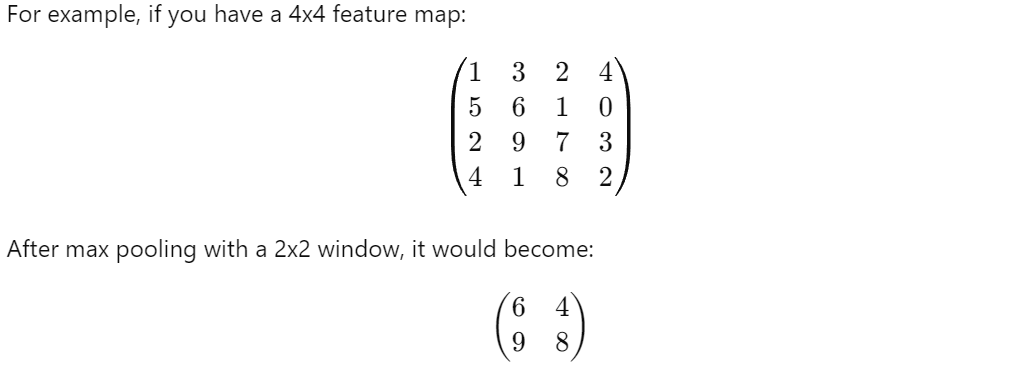

This operation reduces the feature map size, making it more computationally efficient while still preserving important features.

--------------------------------------
#Purpose of This Code
The convolutional layer is used to detect features in the input images by convolving the filters over the image data.

The max pooling layer reduces the dimensionality of the feature maps while retaining the most important information, making the model more efficient and less prone to overfitting.
Together, these two layers form the core building blocks of a typical CNN for image classification tasks.

# 3D, 4D, 5D images

------------------------
# 1. 4D Images
Four-dimensional (4D) images or data commonly refer to 3D images that also change over time. In this context, time is treated as the fourth dimension.

Example: 4D Medical Imaging (Dynamic Volumetric Data)
In medical imaging, 4D data can arise when capturing a sequence of 3D images over time.

This is common in functional MRI (fMRI) or CT scans, where you capture multiple 3D scans over time to observe changes (e.g., brain activity, movement of organs like the heart).

Shape: (time, depth, height, width, channels)
Example: A sequence of 3D MRI images over time would have a shape like (time, depth, height, width, channels).

Code Example (fMRI Data):

    from tensorflow.keras.layers import Conv3D

----------------------
# 2.  4D medical imaging data (e.g., 10 time steps, with a 64x64x64 volumetric image and 1 channel)
model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), input_shape=(10, 64, 64, 64, 1), activation='relu'))

##Use Case:
Functional MRI (fMRI) studies, which track brain activity over time.

4D cardiac CT scans, where the movement of the heart is tracked in 3D over time.

---------------------------
#3. 5D Images
Five-dimensional (5D) data would extend the concept of 4D further, incorporating additional information like multiple modalities or various properties of the data.

In this case, the fifth dimension might represent modalities, frequency, or other channels of information that capture different perspectives of the data.

Example: Multimodal 4D Medical Imaging

In certain medical research, you might capture a patient’s body over time using multiple imaging techniques simultaneously (e.g., CT + MRI + PET scans).

Each modality provides a different type of image (density, molecular activity, etc.), and combining them yields 5D data.

Shape: (time, depth, height, width, modalities)

Example: A sequence of 3D scans over time, with multiple imaging modalities (e.g., CT, MRI, and PET), could be stored in a 5D tensor.

##Use Case:
Multimodal medical diagnostics (CT + MRI + PET scans over time).

-------------------------
#4. Hyperspectral Imaging (More than 3D)
Hyperspectral images capture information across many different wavelengths of the electromagnetic spectrum.

In contrast to typical RGB images, which have 3 color channels (red, green, and blue), hyperspectral images might have hundreds of channels, each representing a different wavelength.

Example: Hyperspectral Imaging

Hyperspectral imaging is widely used in fields such as remote sensing (e.g., satellite imagery), agriculture, and environmental monitoring.

Shape: (height, width, channels)
A hyperspectral image with 200 different wavelengths could be considered 3D (spatial dimensions + spectral channels). If taken over time, this would become 4D data (time, height, width, channels).

##Use Case:
Remote sensing (satellite data to analyze vegetation, minerals, etc.).

Environmental monitoring.
Medical imaging (e.g., distinguishing between tissue types).

------------------------
#5. Higher-Dimensional Scientific Data
In scientific computing, some datasets may go beyond 3D. For example, data from physical simulations, climate models, or particle physics experiments can span multiple dimensions, representing various properties such as position, velocity, time, and energy levels.

Example: Climate Modeling
A climate model might simulate temperature, humidity, and pressure across latitude, longitude, altitude, and time.

Shape: (latitude, longitude, altitude, time)

##Use Case:
Climate simulation and environmental predictions.
Particle physics (e.g., tracking particles in 3D space, with additional dimensions representing velocity, energy, etc.).

Practical Considerations
Handling data beyond 3D typically requires specialized techniques and architectures. For example, 3D convolutional networks can be extended to handle 4D data by treating the fourth dimension (e.g., time) as an additional temporal input. However, the complexity and computational cost increase with each additional dimension.

--------------------------
#Summary
3D data: Volumetric or spatial data like CT scans or 3D images.

4D data: Time-varying 3D data (e.g., video, dynamic MRI).

5D data: 3D data over time with multiple modalities or channels (e.g., multimodal medical imaging).

Hyperspectral data: Data with many spectral channels, often used in environmental and scientific applications.

In most real-world applications, data beyond 3D is rare and typically seen in specialized fields like medical imaging, scientific simulations, and remote sensing.

In [81]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3700 - loss: 1.7367 - val_accuracy: 0.4959 - val_loss: 1.4469
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.5827 - loss: 1.1933 - val_accuracy: 0.6008 - val_loss: 1.1228
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6419 - loss: 1.0279 - val_accuracy: 0.6118 - val_loss: 1.1039
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.6824 - loss: 0.9098 - val_accuracy: 0.6320 - val_loss: 1.0793
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.7173 - loss: 0.8193 - val_accuracy: 0.6527 - val_loss: 1.0306
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.7483 - loss: 0.7384 - val_accuracy: 0.6037 - val_loss: 1.1878
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7656 - loss: 0.6797 - val_accuracy: 0.5871 - val_loss: 1.5106
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7891 -

In [86]:
losses = pd.DataFrame(model.history.history)

In [87]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.45546,1.519457,0.4959,1.446911
1,0.59196,1.163578,0.6008,1.122803
2,0.64834,1.011650,0.6118,1.103892
3,0.68606,0.907813,0.6320,1.079332
4,0.71790,0.822404,0.6527,1.030637


<Axes: >

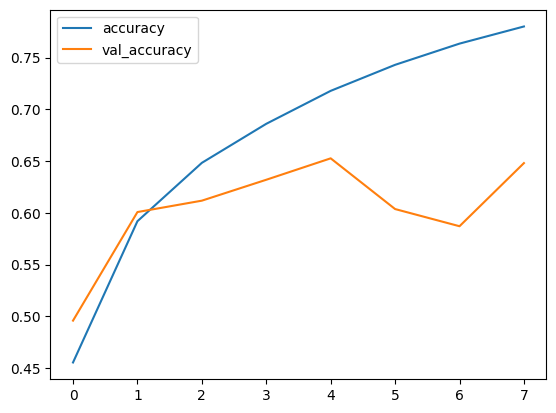

In [88]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

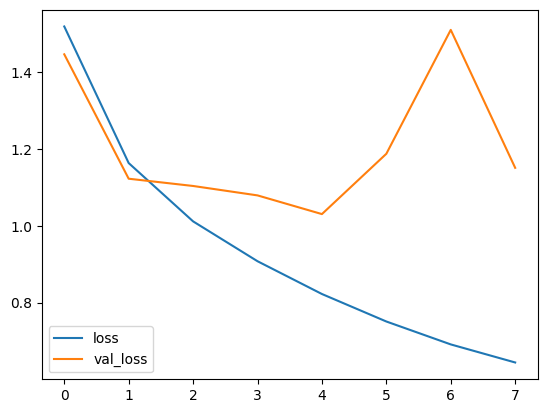

In [89]:
losses[['loss','val_loss']].plot()

In [90]:
model.metrics_names

['loss', 'compile_metrics']

In [91]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[1.151177167892456, 0.6481000185012817]


In [93]:
import numpy as np # import numpy

from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=-1) # use predict and argmax

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1000
           1       0.72      0.84      0.78      1000
           2       0.48      0.59      0.53      1000
           3       0.48      0.53      0.50      1000
           4       0.53      0.74      0.62      1000
           5       0.63      0.44      0.52      1000
           6       0.70      0.75      0.72      1000
           7       0.73      0.69      0.71      1000
           8       0.81      0.67      0.73      1000
           9       0.87      0.56      0.68      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



In [95]:
confusion_matrix(y_test,predictions)

array([[676,  35,  88,  17,  63,  10,  23,   8,  65,  15],
       [ 24, 839,  21,  17,  17,   8,  18,   7,  19,  30],
       [ 56,   5, 591,  63, 129,  52,  63,  27,  11,   3],
       [ 11,  12, 115, 529, 105,  97,  76,  38,  12,   5],
       [  8,   3,  71,  50, 740,  14,  63,  42,   9,   0],
       [  7,   4, 117, 235,  93, 441,  30,  71,   0,   2],
       [  3,   5,  86,  78,  59,   7, 750,   7,   5,   0],
       [ 11,   7,  58,  38, 129,  54,   9, 688,   3,   3],
       [ 98,  55,  46,  46,  29,  10,  16,   7, 670,  23],
       [ 39, 198,  33,  37,  24,  10,  23,  44,  35, 557]])

<Axes: >

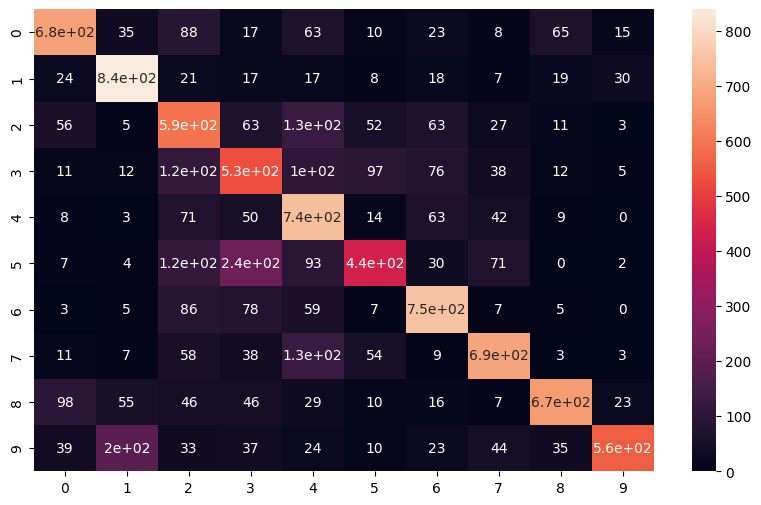

In [96]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Explanation of 5.3e+2
5.3: This is the mantissa, the main number.

e+2: This represents the power of 10 by which the mantissa is multiplied. The e stands for "exponent," and the +2 indicates the exponent is positive.

-----------------------
##How to Interpret It:
5.3e+2 means:

$$5.3×10^2$$

This translates to:

$$5.3×100=530$$
General Format of Scientific Notation:
Scientific notation follows the form:

$$a×10^b$$

Where:

a is a number (the mantissa) between 1 and 10 (or a fraction in the case of negative mantissas).

b is the exponent of 10.

In this case:

a = 5.3

b = 2

# Predicting a given image

In [97]:
my_image = x_test[16]

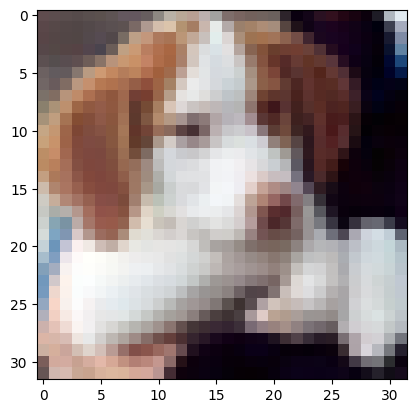

In [98]:
plt.imshow(my_image)

In [100]:
# Use model.predict, then take the argmax to find the predicted class
predictions = model.predict(my_image.reshape(1,32,32,3))
predicted_class = predictions.argmax()

# Print or use the predicted_class as needed
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: 5


In [101]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html